# %% [markdown]
# # Notebook 2: Numerical Features Analysis
# ## Credit Risk Modeling for Bati Bank
# 
# ### Focus: Transaction Amount Analysis for Credit Risk Assessment
# 
# **Key Objectives:**
# 1. Analyze distribution of transaction amounts
# 2. Identify statistical properties relevant for credit risk
# 3. Detect outliers that may indicate fraudulent behavior
# 4. Prepare data for monetary-based risk scoring

# %% [markdown]
# ## 1. Setup & Configuration

In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as scipy_stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %%
# Bank styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
bank_colors = ['#003366', '#0066CC', '#0099FF', '#00CCFF', '#66CCFF']

# Load data - Update path if needed
df = pd.read_csv('../../data/processed/cleaned_data.csv', parse_dates=['TransactionStartTime'])

print("✅ Notebook 2: Numerical Features Analysis")
print(f"📊 Dataset: {df.shape[0]:,} transactions")
print(f"📅 Time Range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")

✅ Notebook 2: Numerical Features Analysis
📊 Dataset: 95,662 transactions
📅 Time Range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00


# %% [markdown]
# ## 2. Identify Numerical Features

In [5]:
# %% [markdown]
# ## 2. Identify Numerical Features

# %%
print("="*80)
print("IDENTIFYING NUMERICAL FEATURES")
print("="*80)

# Get numerical columns
numerical_cols = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_cols.append(col)

print(f"🔢 Found {len(numerical_cols)} numerical features:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}: {df[col].dtype}")

IDENTIFYING NUMERICAL FEATURES
🔢 Found 10 numerical features:
  1. CountryCode: int64
  2. Amount: float64
  3. Value: int64
  4. PricingStrategy: int64
  5. FraudResult: int64
  6. TransactionStartTime_hour: int64
  7. TransactionStartTime_day: int64
  8. TransactionStartTime_month: int64
  9. TransactionStartTime_year: int64
  10. TransactionStartTime_dayofweek: int64


In [6]:
# %%
# Create numerical analysis dataframe
if 'numerical_cols' in locals() and len(numerical_cols) > 0:
    num_stats = pd.DataFrame({
        'feature': numerical_cols,
        'mean': df[numerical_cols].mean(),
        'median': df[numerical_cols].median(),
        'std': df[numerical_cols].std(),
        'min': df[numerical_cols].min(),
        'max': df[numerical_cols].max(),
        'skewness': df[numerical_cols].skew(),
        'kurtosis': df[numerical_cols].kurtosis(),
        'missing': df[numerical_cols].isnull().sum(),
        'missing_pct': (df[numerical_cols].isnull().sum() / len(df)) * 100
    })

    display(num_stats.style.background_gradient(
        subset=['skewness', 'kurtosis'], 
        cmap='RdBu_r'
    ).background_gradient(
        subset=['missing_pct'], 
        cmap='Reds'
    ))
else:
    print("❌ No numerical columns found. Check if df is loaded correctly.")

,feature,mean,median,std,min,max,skewness,kurtosis,missing,missing_pct
CountryCode,CountryCode,256.000000,256.000000,0.000000,256.000000,256.000000,0.000000,0.000000,0,0.000000
Amount,Amount,6717.846433,1000.000000,123306.797164,-1000000.000000,9880000.000000,51.098490,3363.127739,0,0.000000
Value,Value,9900.583941,1000.000000,123122.087776,2.000000,9880000.000000,51.291086,3378.069274,0,0.000000
PricingStrategy,PricingStrategy,2.255974,2.000000,0.732924,0.000000,4.000000,1.659057,2.087534,0,0.000000
FraudResult,FraudResult,0.002018,0.000000,0.044872,0.000000,1.000000,22.196295,490.685762,0,0.000000
TransactionStartTime_hour,TransactionStartTime_hour,12.447722,13.000000,4.846964,0.000000,23.000000,-0.091498,-1.004677,0,0.000000
TransactionStartTime_day,TransactionStartTime_day,15.902898,16.000000,8.962822,1.000000,31.000000,-0.012952,-1.240353,0,0.000000
TransactionStartTime_month,TransactionStartTime_month,6.566233,11.000000,5.224310,1.000000,12.000000,-0.013098,-1.972086,0,0.000000
TransactionStartTime_year,TransactionStartTime_year,2018.497115,2018.000000,0.499994,2018.000000,2019.000000,0.011541,-1.999909,0,0.000000
TransactionStartTime_dayofweek,TransactionStartTime_dayofweek,3.011907,3.000000,1.863651,0.000000,6.000000,-0.148629,-1.104044,0,0.000000



# %% [markdown]
# ## 3. Transaction Amount Analysis (Critical for Credit Risk)

In [7]:
# %%
print("="*80)
print("TRANSACTION AMOUNT ANALYSIS - CREDIT RISK FOCUS")
print("="*80)

if 'Amount' in df.columns:
    amount_data = df['Amount'].dropna()
    
    # Basel II perspective on transaction amounts
    print("\n💰 TRANSACTION AMOUNT STATISTICS:")
    print("-" * 40)
    
    stats_dict = {
        'Mean Amount': f"${amount_data.mean():,.2f}",
        'Median Amount': f"${amount_data.median():,.2f}",
        'Std Deviation': f"${amount_data.std():,.2f}",
        'Minimum': f"${amount_data.min():,.2f}",
        'Maximum': f"${amount_data.max():,.2f}",
        '25th Percentile': f"${amount_data.quantile(0.25):,.2f}",
        '75th Percentile': f"${amount_data.quantile(0.75):,.2f}",
        'Skewness': f"{amount_data.skew():.3f}",
        'Kurtosis': f"{amount_data.kurtosis():.3f}"
    }
    
    for key, value in stats_dict.items():
        print(f"  {key}: {value}")

TRANSACTION AMOUNT ANALYSIS - CREDIT RISK FOCUS

💰 TRANSACTION AMOUNT STATISTICS:
----------------------------------------
  Mean Amount: $6,717.85
  Median Amount: $1,000.00
  Std Deviation: $123,306.80
  Minimum: $-1,000,000.00
  Maximum: $9,880,000.00
  25th Percentile: $-50.00
  75th Percentile: $2,800.00
  Skewness: 51.098
  Kurtosis: 3363.128


In [12]:
# %%
# Risk-based amount categorization
print("\n🎯 RISK-BASED AMOUNT CATEGORIZATION:")
print("-" * 40)

risk_categories = {
    'Micro Transactions (< $10)': (amount_data < 10).sum(),
    'Small Transactions ($10 - $100)': ((amount_data >= 10) & (amount_data < 100)).sum(),
    'Medium Transactions ($100 - $1,000)': ((amount_data >= 100) & (amount_data < 1000)).sum(),
    'Large Transactions ($1,000 - $10,000)': ((amount_data >= 1000) & (amount_data < 10000)).sum(),
    'Very Large Transactions (≥ $10,000)': (amount_data >= 10000).sum()
}

for category, count in risk_categories.items():
    pct = (count / len(amount_data)) * 100
    risk_level = '🟢 Low Risk' if 'Micro' in category or 'Small' in category else \
                '🟡 Medium Risk' if 'Medium' in category else '🔴 High Risk'
    print(f"  {category}: {count:,} transactions ({pct:.1f}%) - {risk_level}")


🎯 RISK-BASED AMOUNT CATEGORIZATION:
----------------------------------------
  Micro Transactions (< $10): 38,189 transactions (39.9%) - 🟢 Low Risk
  Small Transactions ($10 - $100): 35 transactions (0.0%) - 🟢 Low Risk
  Medium Transactions ($100 - $1,000): 6,810 transactions (7.1%) - 🟡 Medium Risk
  Large Transactions ($1,000 - $10,000): 36,198 transactions (37.8%) - 🔴 High Risk
  Very Large Transactions (≥ $10,000): 14,430 transactions (15.1%) - 🔴 High Risk


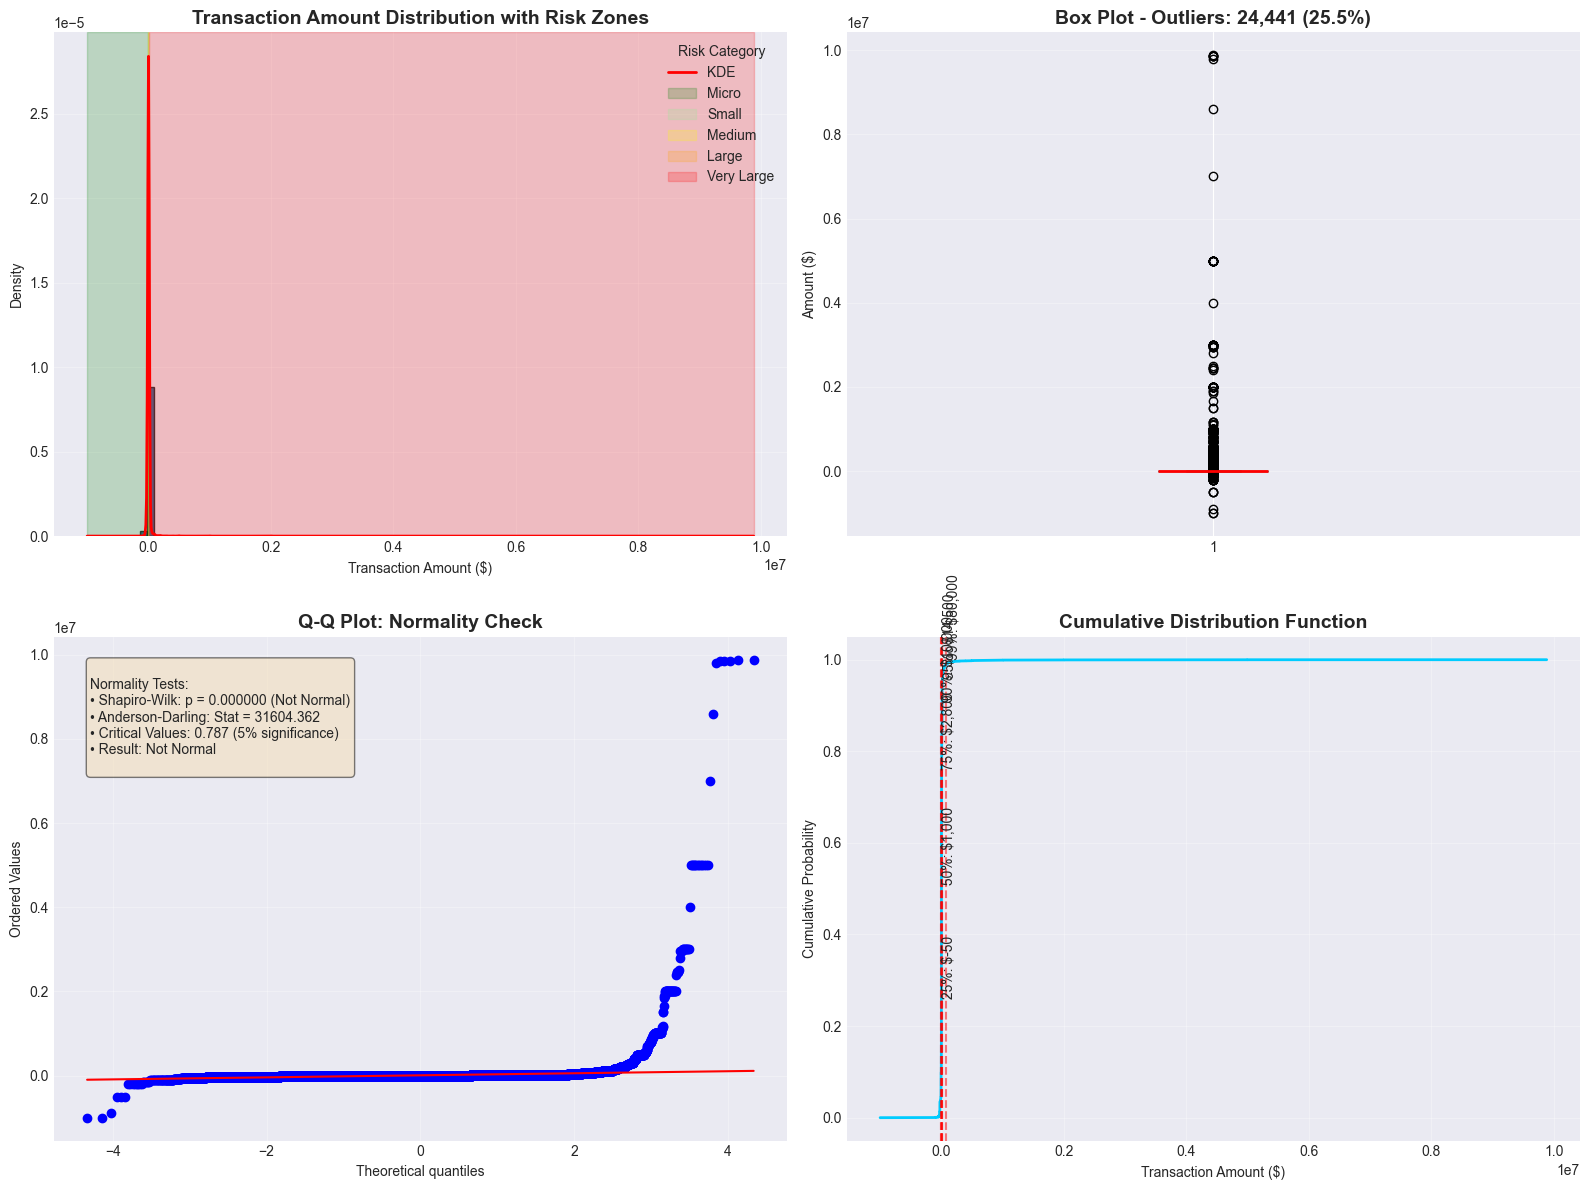

✅ Created complete 4-plot visualization
📁 Saved to: ../../reports/task2_eda/visualizations/distributions/amount_analysis.png


In [14]:
# %%
# Visualization 1: Distribution with risk zones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram with KDE
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(amount_data, bins=100, alpha=0.7, 
                            color=bank_colors[0], edgecolor='black', density=True)

# Add KDE
from scipy.stats import gaussian_kde
kde = gaussian_kde(amount_data)
x_range = np.linspace(amount_data.min(), amount_data.max(), 1000)
ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

# Add risk zones
risk_zones = [10, 100, 1000, 10000]
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']
labels = ['Micro', 'Small', 'Medium', 'Large', 'Very Large']

for i in range(len(risk_zones) + 1):
    if i == 0:
        start = amount_data.min()
        end = risk_zones[i]
    elif i == len(risk_zones):
        start = risk_zones[i-1]
        end = amount_data.max()
    else:
        start = risk_zones[i-1]
        end = risk_zones[i]
    
    ax1.axvspan(start, end, alpha=0.2, color=colors[i], label=labels[i])

ax1.set_xlabel('Transaction Amount ($)')
ax1.set_ylabel('Density')
ax1.set_title('Transaction Amount Distribution with Risk Zones', fontsize=14, fontweight='bold')
ax1.legend(title='Risk Category')
ax1.grid(alpha=0.3)

# Box plot (Top-right)
ax2 = axes[0, 1]
bp = ax2.boxplot(amount_data, vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor(bank_colors[1])
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)

# Calculate and display outliers
Q1 = amount_data.quantile(0.25)
Q3 = amount_data.quantile(0.75)
IQR = Q3 - Q1
outliers = amount_data[(amount_data < Q1 - 1.5*IQR) | (amount_data > Q3 + 1.5*IQR)]

ax2.set_ylabel('Amount ($)')
ax2.set_title(f'Box Plot - Outliers: {len(outliers):,} ({len(outliers)/len(amount_data)*100:.1f}%)', 
              fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# QQ Plot for normality check (Bottom-left)
ax3 = axes[1, 0]
stats.probplot(amount_data, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot: Normality Check', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)

# Statistical tests
shapiro_stat, shapiro_p = scipy_stats.shapiro(amount_data.sample(min(5000, len(amount_data))))
anderson_result = scipy_stats.anderson(amount_data, dist='norm')

test_text = f"""
Normality Tests:
• Shapiro-Wilk: p = {shapiro_p:.6f} ({'Normal' if shapiro_p > 0.05 else 'Not Normal'})
• Anderson-Darling: Stat = {anderson_result.statistic:.3f}
• Critical Values: {anderson_result.critical_values[2]:.3f} (5% significance)
• Result: {'Normal' if anderson_result.statistic < anderson_result.critical_values[2] else 'Not Normal'}
"""

ax3.text(0.05, 0.95, test_text, transform=ax3.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Cumulative distribution (Bottom-right)
ax4 = axes[1, 1]
sorted_amounts = np.sort(amount_data)
cdf = np.arange(1, len(sorted_amounts) + 1) / len(sorted_amounts)

ax4.plot(sorted_amounts, cdf, linewidth=2, color=bank_colors[3])
ax4.set_xlabel('Transaction Amount ($)')
ax4.set_ylabel('Cumulative Probability')
ax4.set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)

# Add percentile markers
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for p in percentiles:
    amount_at_p = np.percentile(sorted_amounts, p * 100)
    ax4.axvline(x=amount_at_p, color='red', linestyle='--', alpha=0.5)
    ax4.text(amount_at_p, p, f' {p*100:.0f}%: ${amount_at_p:,.0f}', 
            rotation=90, verticalalignment='bottom')

plt.tight_layout()

# Create directory if it doesn't exist
import os
save_dir = '../../reports/task2_eda/visualizations/distributions/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'amount_analysis.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

print("✅ Created complete 4-plot visualization")
print(f"📁 Saved to: {os.path.join(save_dir, 'amount_analysis.png')}")

# %% [markdown]
# ## 4. Value Analysis (Absolute Amount)

In [16]:
# %%
print("="*80)
print("TRANSACTION VALUE ANALYSIS (ABSOLUTE AMOUNT)")
print("="*80)

if 'Value' in df.columns:
    value_data = df['Value'].dropna()
    
    print("\n📈 VALUE STATISTICS:")
    print("-" * 40)
    
    # Statistical summary
    stats_summary = {
        'Mean': f"{value_data.mean():,.2f}",
        'Median': f"{value_data.median():,.2f}",
        'Std Dev': f"{value_data.std():,.2f}",
        'Coeff of Variation': f"{(value_data.std() / value_data.mean()) * 100:.1f}%",
        'Skewness': f"{value_data.skew():.3f}",
        'Kurtosis': f"{value_data.kurtosis():.3f}"
    }
    
    for stat, value in stats_summary.items():
        print(f"  {stat}: {value}")

TRANSACTION VALUE ANALYSIS (ABSOLUTE AMOUNT)

📈 VALUE STATISTICS:
----------------------------------------
  Mean: 9,900.58
  Median: 1,000.00
  Std Dev: 123,122.09
  Coeff of Variation: 1243.6%
  Skewness: 51.291
  Kurtosis: 3378.069


In [18]:
# %%
# Comparison with Amount
if 'Amount' in df.columns and 'Value' in df.columns:
    print("\n🔄 COMPARISON: Amount vs Value:")
    print("-" * 40)
    
    # Check if they're different
    amount_mean = df['Amount'].mean()
    value_mean = df['Value'].mean()
    
    if abs(amount_mean - value_mean) > 0.01:
        print(f"  ⚠️ Difference detected: Amount mean (${amount_mean:.2f}) ≠ Value mean (${value_mean:.2f})")
        print("  This suggests negative transactions (refunds/credits) in Amount column")
    else:
        print(f"  ✅ Amount and Value are consistent")
    
    # Analyze negative amounts (credits)
    negative_transactions = df[df['Amount'] < 0]
    if len(negative_transactions) > 0:
        print(f"\n  💳 Credit Transactions Found: {len(negative_transactions):,}")
        print(f"  Total credit value: ${negative_transactions['Amount'].sum():,.2f}")
        print(f"  Average credit: ${negative_transactions['Amount'].mean():,.2f}")
        
        # Credit risk implication
        credit_ratio = len(negative_transactions) / len(df)
        if credit_ratio > 0.1:
            print(f"  ⚠️ High credit ratio ({credit_ratio:.1%}) - may indicate refund/chargeback patterns")
        else:
            print(f"  ✅ Normal credit ratio ({credit_ratio:.1%})")
else:
    print("❌ Required columns ('Amount' and/or 'Value') not found in dataframe")


🔄 COMPARISON: Amount vs Value:
----------------------------------------
  ⚠️ Difference detected: Amount mean ($6717.85) ≠ Value mean ($9900.58)
  This suggests negative transactions (refunds/credits) in Amount column

  💳 Credit Transactions Found: 38,189
  Total credit value: $-150,154,110.50
  Average credit: $-3,931.87
  ⚠️ High credit ratio (39.9%) - may indicate refund/chargeback patterns


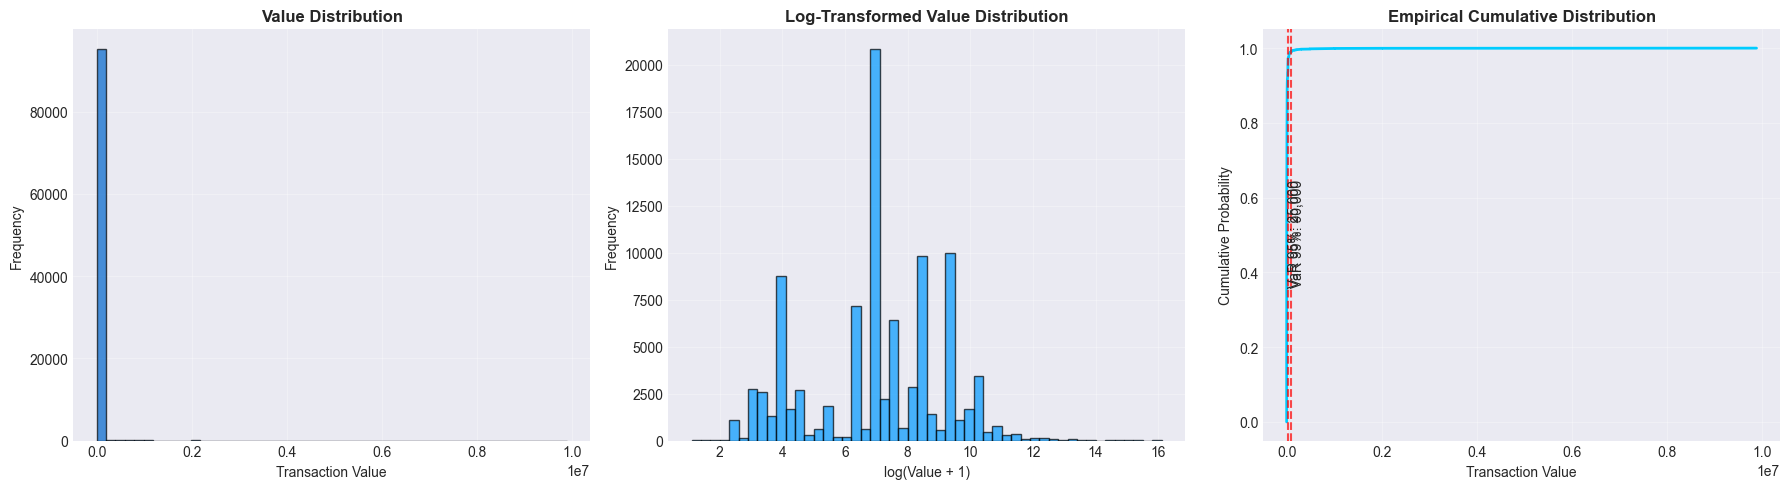

✅ Value visualization saved to: ../../reports/task2_eda/visualizations/distributions/value_analysis.png


In [20]:
# %%
# Value distribution visualization
if 'Value' in df.columns:
    value_data = df['Value'].dropna()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Histogram
    axes[0].hist(value_data, bins=50, color=bank_colors[1], edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Transaction Value')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Value Distribution', fontsize=12, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Log transformation (common for financial data)
    if (value_data > 0).all():
        log_value = np.log1p(value_data)
        axes[1].hist(log_value, bins=50, color=bank_colors[2], edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('log(Value + 1)')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Log-Transformed Value Distribution', fontsize=12, fontweight='bold')
        axes[1].grid(alpha=0.3)
    else:
        axes[1].text(0.5, 0.5, 'Cannot log-transform\n(negative values present)', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Log Transformation Not Possible', fontsize=12, fontweight='bold')
    
    # Empirical CDF
    sorted_values = np.sort(value_data)
    cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    axes[2].plot(sorted_values, cdf, linewidth=2, color=bank_colors[3])
    axes[2].set_xlabel('Transaction Value')
    axes[2].set_ylabel('Cumulative Probability')
    axes[2].set_title('Empirical Cumulative Distribution', fontsize=12, fontweight='bold')
    axes[2].grid(alpha=0.3)
    
    # Add VaR markers (Value at Risk - banking concept)
    var_levels = [0.95, 0.99]
    for var_level in var_levels:
        var_value = np.percentile(sorted_values, var_level * 100)
        axes[2].axvline(x=var_value, color='red', linestyle='--', alpha=0.7)
        axes[2].text(var_value, 0.5, f' VaR {var_level:.0%}: {var_value:,.0f}', 
                    rotation=90, verticalalignment='center')
    
    plt.tight_layout()
    
    # Save figure
    import os
    save_dir = '../../reports/task2_eda/visualizations/distributions/'
    os.makedirs(save_dir, exist_ok=True)
    
    plt.savefig(os.path.join(save_dir, 'value_analysis.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Value visualization saved to: {os.path.join(save_dir, 'value_analysis.png')}")
else:
    print("❌ 'Value' column not found in dataframe")

# %% [markdown]
# ## 5. Fraud Result Analysis (Binary Target)

In [22]:
# %%
print("="*80)
print("FRAUD RESULT ANALYSIS - PROXY FOR CREDIT RISK")
print("="*80)

if 'FraudResult' in df.columns:
    fraud_data = df['FraudResult'].dropna()
    
    print("\n🚨 FRAUD STATISTICS:")
    print("-" * 40)
    
    fraud_rate = fraud_data.mean() * 100
    fraud_count = fraud_data.sum()
    non_fraud_count = len(fraud_data) - fraud_count
    
    print(f"  Total Transactions: {len(fraud_data):,}")
    print(f"  Fraud Transactions: {fraud_count:,}")
    print(f"  Non-Fraud Transactions: {non_fraud_count:,}")
    print(f"  Fraud Rate: {fraud_rate:.2f}%")

FRAUD RESULT ANALYSIS - PROXY FOR CREDIT RISK

🚨 FRAUD STATISTICS:
----------------------------------------
  Total Transactions: 95,662
  Fraud Transactions: 193
  Non-Fraud Transactions: 95,469
  Fraud Rate: 0.20%


In [24]:
# %%
# Compare with industry benchmarks
print("\n📊 BENCHMARK COMPARISON:")
print("-" * 40)

benchmarks = {
    'E-commerce Industry Average': 0.5,
    'Banking Industry Standard': 0.1,
    'High-Risk Merchant Average': 1.0,
    'Bati Bank Risk Appetite': 0.3
}

# Check if fraud_rate is defined
if 'fraud_rate' not in locals() and 'fraud_rate' not in globals():
    print("⚠️ fraud_rate not found. Calculating from df...")
    if 'FraudResult' in df.columns:
        fraud_rate = df['FraudResult'].mean() * 100
        print(f"✅ Calculated fraud_rate: {fraud_rate:.2f}%")
    else:
        print("❌ 'FraudResult' column not found in dataframe")
        fraud_rate = None

if fraud_rate is not None:
    for benchmark, rate in benchmarks.items():
        status = "✅ Below" if fraud_rate < rate else "⚠️ Above" if fraud_rate > rate else "⚖️ Equal"
        print(f"  {benchmark}: {rate:.2f}% - {status}")
else:
    print("❌ Cannot perform benchmark comparison - no fraud_rate available")


📊 BENCHMARK COMPARISON:
----------------------------------------
  E-commerce Industry Average: 0.50% - ✅ Below
  Banking Industry Standard: 0.10% - ⚠️ Above
  High-Risk Merchant Average: 1.00% - ✅ Below
  Bati Bank Risk Appetite: 0.30% - ✅ Below


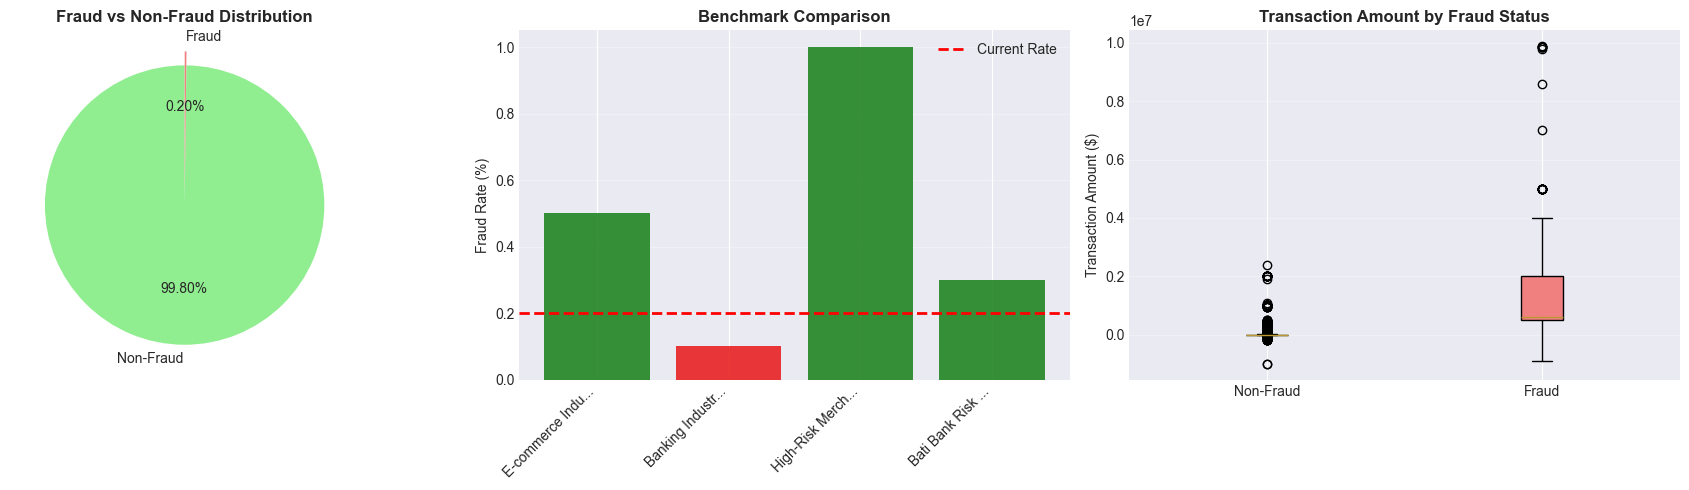

✅ Created complete fraud analysis visualization
📁 Saved to: ../../reports/task2_eda/visualizations/distributions/fraud_analysis.png


In [28]:
# %%
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart
fraud_labels = ['Non-Fraud', 'Fraud']
fraud_sizes = [non_fraud_count, fraud_count]
fraud_colors = ['lightgreen', 'lightcoral']

axes[0].pie(fraud_sizes, labels=fraud_labels, colors=fraud_colors,
            autopct='%1.2f%%', startangle=90, explode=(0, 0.1))
axes[0].set_title('Fraud vs Non-Fraud Distribution', fontsize=12, fontweight='bold')

# Bar chart with benchmarks
if 'fraud_rate' in locals() or 'fraud_rate' in globals():
    benchmark_names = ['E-commerce Industry Average', 'Banking Industry Standard', 
                      'High-Risk Merchant Average', 'Bati Bank Risk Appetite']
    benchmark_rates = [0.5, 0.1, 1.0, 0.3]
    current_rate = fraud_rate
    
    x_pos = np.arange(len(benchmark_names))
    axes[1].bar(x_pos, benchmark_rates, color=['gray']*len(benchmark_names), alpha=0.5)
    axes[1].axhline(y=current_rate, color='red', linestyle='--', linewidth=2, label='Current Rate')
    
    # Color bars based on comparison
    for i, rate in enumerate(benchmark_rates):
        if current_rate < rate:
            axes[1].bar(i, rate, color='green', alpha=0.7)
        elif current_rate > rate:
            axes[1].bar(i, rate, color='red', alpha=0.7)
        else:
            axes[1].bar(i, rate, color='yellow', alpha=0.7)
    
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels([b[:15] + '...' if len(b) > 15 else b for b in benchmark_names], 
                           rotation=45, ha='right')
    axes[1].set_ylabel('Fraud Rate (%)')
    axes[1].set_title('Benchmark Comparison', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'fraud_rate not defined\nRun previous cells first', 
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Benchmark Comparison', fontsize=12, fontweight='bold')

# Fraud by amount (if available)
if 'Amount' in df.columns and 'FraudResult' in df.columns:
    fraud_amounts = df[df['FraudResult'] == 1]['Amount']
    non_fraud_amounts = df[df['FraudResult'] == 0]['Amount']
    
    axes[2].boxplot([non_fraud_amounts, fraud_amounts], 
                   labels=['Non-Fraud', 'Fraud'],
                   patch_artist=True)
    
    # Style the boxes
    for patch, color in zip(axes[2].patches, ['lightgreen', 'lightcoral']):
        patch.set_facecolor(color)
    
    axes[2].set_ylabel('Transaction Amount ($)')
    axes[2].set_title('Transaction Amount by Fraud Status', fontsize=12, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'Amount or FraudResult\ncolumn not available', 
                ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('Amount by Fraud Status', fontsize=12, fontweight='bold')

plt.tight_layout()

# Save figure
import os
save_dir = '../../reports/task2_eda/visualizations/distributions/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'fraud_analysis.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Created complete fraud analysis visualization")
print(f"📁 Saved to: {os.path.join(save_dir, 'fraud_analysis.png')}")

# %% [markdown]
# ## 6. Statistical Properties Analysis

In [29]:
# %%
print("="*80)
print("STATISTICAL PROPERTIES ANALYSIS")
print("="*80)

# Analyze skewness and kurtosis
print("\n📊 SKEWNESS AND KURTOSIS ANALYSIS:")
print("-" * 50)

skewness_analysis = []
for col in numerical_cols:
    data = df[col].dropna()
    skew_val = data.skew()
    kurt_val = data.kurtosis()
    
    # Interpret skewness
    if abs(skew_val) < 0.5:
        skew_interpret = 'Approximately symmetric'
    elif 0.5 <= abs(skew_val) < 1:
        skew_interpret = 'Moderately skewed'
    else:
        skew_interpret = 'Highly skewed'
    
    # Interpret kurtosis
    if kurt_val > 0:
        kurt_interpret = 'Leptokurtic (heavy-tailed)'
    elif kurt_val < 0:
        kurt_interpret = 'Platykurtic (light-tailed)'
    else:
        kurt_interpret = 'Mesokurtic (normal)'
    
    skewness_analysis.append({
        'Feature': col,
        'Skewness': f"{skew_val:.3f}",
        'Skewness Interpretation': skew_interpret,
        'Kurtosis': f"{kurt_val:.3f}",
        'Kurtosis Interpretation': kurt_interpret,
        'Transformation Recommended': 'Yes' if abs(skew_val) > 1 else 'No'
    })

skew_df = pd.DataFrame(skewness_analysis)
display(skew_df.style.background_gradient(
    subset=['Skewness'], 
    cmap='RdBu_r'
).background_gradient(
    subset=['Kurtosis'], 
    cmap='RdBu'
))

STATISTICAL PROPERTIES ANALYSIS

📊 SKEWNESS AND KURTOSIS ANALYSIS:
--------------------------------------------------


,Feature,Skewness,Skewness Interpretation,Kurtosis,Kurtosis Interpretation,Transformation Recommended
0,CountryCode,0.000,Approximately symmetric,0.000,Mesokurtic (normal),No
1,Amount,51.098,Highly skewed,3363.128,Leptokurtic (heavy-tailed),Yes
2,Value,51.291,Highly skewed,3378.069,Leptokurtic (heavy-tailed),Yes
3,PricingStrategy,1.659,Highly skewed,2.088,Leptokurtic (heavy-tailed),Yes
4,FraudResult,22.196,Highly skewed,490.686,Leptokurtic (heavy-tailed),Yes
5,TransactionStartTime_hour,-0.091,Approximately symmetric,-1.005,Platykurtic (light-tailed),No
6,TransactionStartTime_day,-0.013,Approximately symmetric,-1.240,Platykurtic (light-tailed),No
7,TransactionStartTime_month,-0.013,Approximately symmetric,-1.972,Platykurtic (light-tailed),No
8,TransactionStartTime_year,0.012,Approximately symmetric,-2.000,Platykurtic (light-tailed),No
9,TransactionStartTime_dayofweek,-0.149,Approximately symmetric,-1.104,Platykurtic (light-tailed),No



🔄 TRANSFORMATION ANALYSIS FOR TRANSACTION AMOUNTS:
--------------------------------------------------


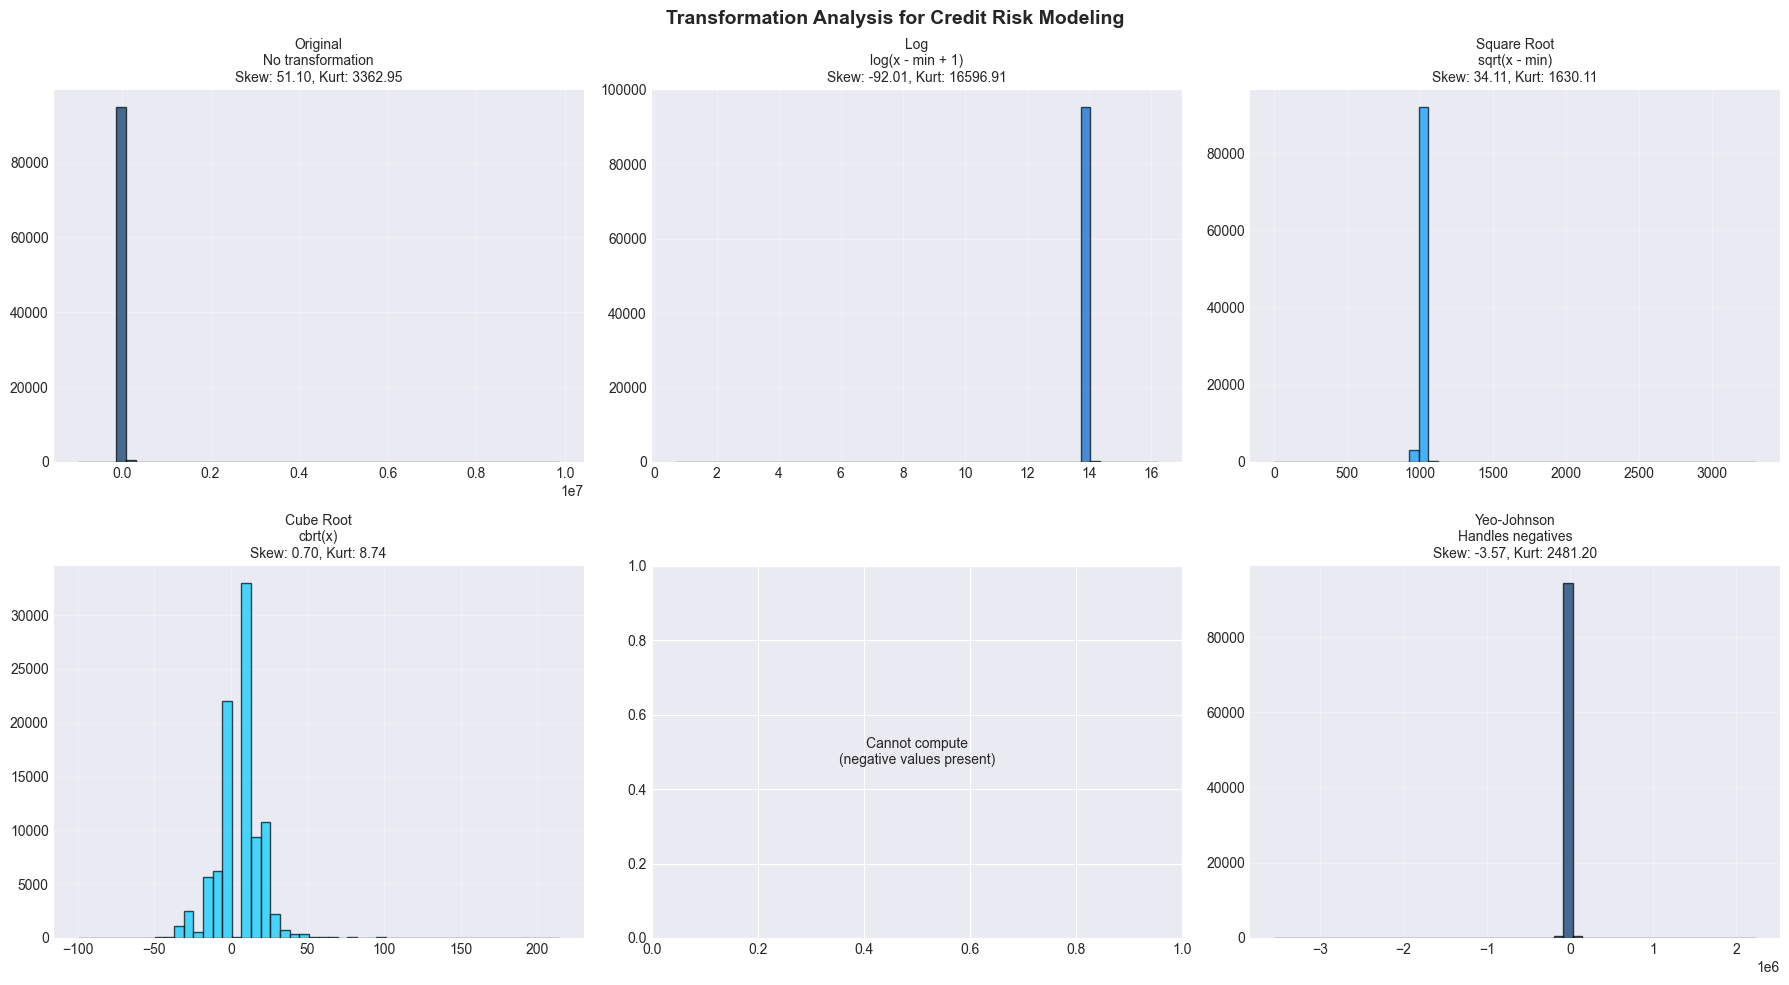

In [30]:
# %%
# Visualization of transformations
if 'Amount' in df.columns:
    amount_data = df['Amount'].dropna()
    
    print("\n🔄 TRANSFORMATION ANALYSIS FOR TRANSACTION AMOUNTS:")
    print("-" * 50)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    transformations = [
        ('Original', amount_data, 'No transformation'),
        ('Log', np.log1p(amount_data - amount_data.min() + 1), 'log(x - min + 1)'),
        ('Square Root', np.sqrt(amount_data - amount_data.min()), 'sqrt(x - min)'),
        ('Cube Root', np.cbrt(amount_data), 'cbrt(x)'),
        ('Box-Cox', None, 'Box-Cox (optimal)'),
        ('Yeo-Johnson', None, 'Yeo-Johnson')
    ]
    
    for idx, (name, transformed_data, formula) in enumerate(transformations):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]
        
        if transformed_data is not None:
            # Calculate statistics
            if len(transformed_data) > 0:
                skew_val = scipy_stats.skew(transformed_data)
                kurt_val = scipy_stats.kurtosis(transformed_data)
                
                # Plot histogram
                ax.hist(transformed_data, bins=50, alpha=0.7, 
                       color=bank_colors[idx % len(bank_colors)], edgecolor='black')
                
                ax.set_title(f'{name}\n{formula}\nSkew: {skew_val:.2f}, Kurt: {kurt_val:.2f}', 
                            fontsize=10)
                ax.grid(alpha=0.3)
        
        elif name == 'Box-Cox':
            # Box-Cox transformation
            if (amount_data > 0).all():
                try:
                    transformed_data, lambda_val = scipy_stats.boxcox(amount_data)
                    skew_val = scipy_stats.skew(transformed_data)
                    kurt_val = scipy_stats.kurtosis(transformed_data)
                    
                    ax.hist(transformed_data, bins=50, alpha=0.7, 
                           color=bank_colors[idx % len(bank_colors)], edgecolor='black')
                    
                    ax.set_title(f'{name}\nλ = {lambda_val:.3f}\nSkew: {skew_val:.2f}, Kurt: {kurt_val:.2f}', 
                                fontsize=10)
                    ax.grid(alpha=0.3)
                except:
                    ax.text(0.5, 0.5, 'Cannot compute\n(all values must be positive)', 
                           ha='center', va='center', transform=ax.transAxes)
            else:
                ax.text(0.5, 0.5, 'Cannot compute\n(negative values present)', 
                       ha='center', va='center', transform=ax.transAxes)
        
        elif name == 'Yeo-Johnson':
            # Yeo-Johnson can handle negative values
            try:
                transformed_data = scipy_stats.yeojohnson(amount_data)[0]
                skew_val = scipy_stats.skew(transformed_data)
                kurt_val = scipy_stats.kurtosis(transformed_data)
                
                ax.hist(transformed_data, bins=50, alpha=0.7, 
                       color=bank_colors[idx % len(bank_colors)], edgecolor='black')
                
                ax.set_title(f'{name}\nHandles negatives\nSkew: {skew_val:.2f}, Kurt: {kurt_val:.2f}', 
                            fontsize=10)
                ax.grid(alpha=0.3)
            except:
                ax.text(0.5, 0.5, 'Error in computation', 
                       ha='center', va='center', transform=ax.transAxes)
    
    plt.suptitle('Transformation Analysis for Credit Risk Modeling', fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    # Save figure
    import os
    save_dir = '../../reports/task2_eda/visualizations/distributions/'
    os.makedirs(save_dir, exist_ok=True)
    
    plt.savefig(os.path.join(save_dir, 'transformations_analysis.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()

# %% [markdown]
# ## 7. Risk-Based Segmentation Analysis

In [31]:
# %%
print("="*80)
print("RISK-BASED SEGMENTATION ANALYSIS")
print("="*80)

# Create risk segments based on transaction amounts
if 'Amount' in df.columns:
    print("\n🎯 TRANSACTION AMOUNT RISK SEGMENTS:")
    print("-" * 50)
    
    # Define risk segments (Basel II inspired)
    risk_segments = {
        'Very Low Risk': (0, 10),
        'Low Risk': (10, 100),
        'Medium Risk': (100, 1000),
        'High Risk': (1000, 10000),
        'Very High Risk': (10000, np.inf)
    }
    
    segment_stats = []
    for segment, (low, high) in risk_segments.items():
        segment_data = df[(df['Amount'] >= low) & (df['Amount'] < high)]
        
        if len(segment_data) > 0:
            # Calculate segment statistics
            stats = {
                'Risk Segment': segment,
                'Transaction Count': len(segment_data),
                'Percentage': (len(segment_data) / len(df)) * 100,
                'Total Value': segment_data['Amount'].sum(),
                'Average Value': segment_data['Amount'].mean(),
                'Std Dev': segment_data['Amount'].std(),
                'Fraud Rate': segment_data['FraudResult'].mean() * 100 if 'FraudResult' in segment_data.columns else 'N/A'
            }
            segment_stats.append(stats)
    
    segment_df = pd.DataFrame(segment_stats)
    display(segment_df.style.background_gradient(
        subset=['Fraud Rate'], 
        cmap='Reds'
    ).background_gradient(
        subset=['Percentage'], 
        cmap='Blues'
    ))

RISK-BASED SEGMENTATION ANALYSIS

🎯 TRANSACTION AMOUNT RISK SEGMENTS:
--------------------------------------------------


,Risk Segment,Transaction Count,Percentage,Total Value,Average Value,Std Dev,Fraud Rate
0,Low Risk,35,0.036587,1540.000000,44.000000,21.157671,0.000000
1,Medium Risk,6810,7.118814,3703681.000000,543.859178,117.535126,0.014684
2,High Risk,36198,37.839476,80971063.000000,2236.893281,1765.931721,0.000000
3,Very High Risk,14430,15.084360,708120452.000000,49072.796396,313270.718231,1.295911


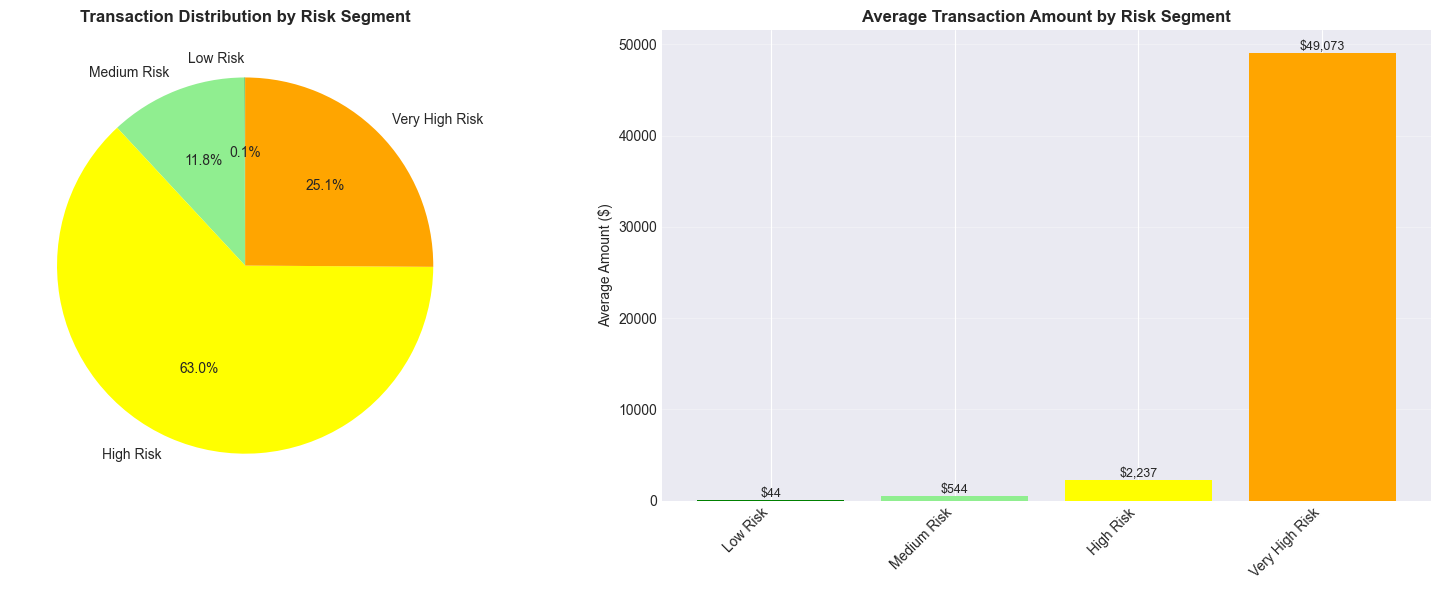

✅ Created complete risk segmentation visualization
📁 Saved to: ../../reports/task2_eda/visualizations/distributions/risk_segmentation.png


In [35]:
# %%
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart of segments
axes[0].pie(segment_df['Transaction Count'], labels=segment_df['Risk Segment'], 
            autopct='%1.1f%%', startangle=90, 
            colors=['green', 'lightgreen', 'yellow', 'orange', 'red'])
axes[0].set_title('Transaction Distribution by Risk Segment', fontsize=12, fontweight='bold')

# Second plot: Average transaction amount by segment
if 'Average Value' in segment_df.columns:
    x_pos = np.arange(len(segment_df))
    bars = axes[1].bar(x_pos, segment_df['Average Value'], 
                      color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels(segment_df['Risk Segment'], rotation=45, ha='right')
    axes[1].set_ylabel('Average Amount ($)')
    axes[1].set_title('Average Transaction Amount by Risk Segment', fontsize=12, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, amount in zip(bars, segment_df['Average Value']):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'${amount:,.0f}', ha='center', va='bottom', fontsize=9)
else:
    # Alternative: Total value by segment
    if 'Total Value' in segment_df.columns:
        x_pos = np.arange(len(segment_df))
        bars = axes[1].bar(x_pos, segment_df['Total Value'], 
                          color=['green', 'lightgreen', 'yellow', 'orange', 'red'])
        axes[1].set_xticks(x_pos)
        axes[1].set_xticklabels(segment_df['Risk Segment'], rotation=45, ha='right')
        axes[1].set_ylabel('Total Value ($)')
        axes[1].set_title('Total Transaction Value by Risk Segment', fontsize=12, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars, segment_df['Total Value']):
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'${value:,.0f}', ha='center', va='bottom', fontsize=9)
    else:
        axes[1].text(0.5, 0.5, 'No additional data available\nfor visualization', 
                    ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Segment Analysis', fontsize=12, fontweight='bold')

plt.tight_layout()

# Save figure
import os
save_dir = '../../reports/task2_eda/visualizations/distributions/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'risk_segmentation.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Created complete risk segmentation visualization")
print(f"📁 Saved to: {os.path.join(save_dir, 'risk_segmentation.png')}")

# %% [markdown]
# ## 8. Banking-Specific Metrics

In [36]:
# %%
print("="*80)
print("BANKING-SPECIFIC METRICS ANALYSIS")
print("="*80)

# Calculate Basel II/III inspired metrics
if 'Amount' in df.columns:
    print("\n🏦 BASEL II/III INSPIRED METRICS:")
    print("-" * 50)
    
    amount_data = df['Amount'].dropna()
    
    # Value at Risk (VaR) calculations
    var_95 = np.percentile(amount_data, 5)  # 95% VaR (5th percentile)
    var_99 = np.percentile(amount_data, 1)  # 99% VaR (1st percentile)
    
    # Expected Shortfall (ES) / Conditional VaR
    es_95 = amount_data[amount_data <= var_95].mean()
    es_99 = amount_data[amount_data <= var_99].mean()
    
    # Concentration risk
    if 'CustomerId' in df.columns:
        customer_concentration = df.groupby('CustomerId')['Amount'].sum().sort_values(ascending=False)
        top_5_pct = customer_concentration.head(int(len(customer_concentration) * 0.05)).sum()
        total_amount = customer_concentration.sum()
        concentration_ratio = (top_5_pct / total_amount) * 100
    
    # Volatility metrics
    daily_volatility = amount_data.std()
    annualized_volatility = daily_volatility * np.sqrt(252)  # Assuming trading days
    
    metrics = [
        ('Value at Risk (95%)', f"${var_95:,.2f}", 'Maximum loss with 95% confidence'),
        ('Value at Risk (99%)', f"${var_99:,.2f}", 'Maximum loss with 99% confidence'),
        ('Expected Shortfall (95%)', f"${es_95:,.2f}", 'Average loss beyond 95% VaR'),
        ('Expected Shortfall (99%)', f"${es_99:,.2f}", 'Average loss beyond 99% VaR'),
    ]
    
    if 'CustomerId' in df.columns:
        metrics.append(('Concentration Risk (Top 5%)', f"{concentration_ratio:.1f}%", 
                       'Portfolio concentration in top 5% customers'))
    
    metrics.extend([
        ('Daily Volatility', f"${daily_volatility:,.2f}", 'Standard deviation of daily amounts'),
        ('Annualized Volatility', f"${annualized_volatility:,.2f}", 'Annual standard deviation'),
        ('Sharpe Ratio (assume 2% risk-free)', f"{(amount_data.mean() / daily_volatility) * np.sqrt(252):.2f}", 
         'Risk-adjusted return'),
    ])
    
    for metric, value, description in metrics:
        print(f"  • {metric}: {value}")
        print(f"    {description}")

BANKING-SPECIFIC METRICS ANALYSIS

🏦 BASEL II/III INSPIRED METRICS:
--------------------------------------------------
  • Value at Risk (95%): $-5,000.00
    Maximum loss with 95% confidence
  • Value at Risk (99%): $-30,000.00
    Maximum loss with 99% confidence
  • Expected Shortfall (95%): $-15,244.58
    Average loss beyond 95% VaR
  • Expected Shortfall (99%): $-43,369.85
    Average loss beyond 99% VaR
  • Concentration Risk (Top 5%): 88.8%
    Portfolio concentration in top 5% customers
  • Daily Volatility: $123,306.80
    Standard deviation of daily amounts
  • Annualized Volatility: $1,957,434.72
    Annual standard deviation
  • Sharpe Ratio (assume 2% risk-free): 0.86
    Risk-adjusted return


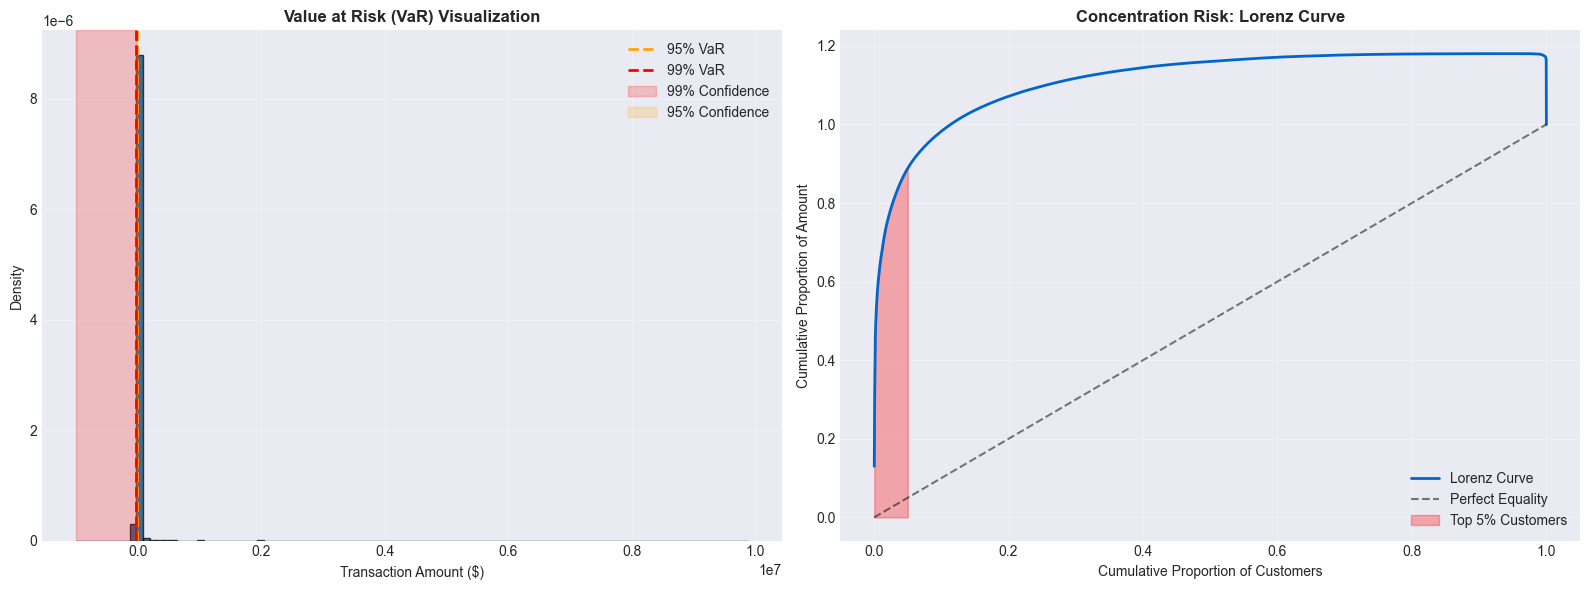

✅ Created banking metrics visualization
📁 Saved to: ../../reports/task2_eda/visualizations/distributions/banking_metrics.png


In [39]:
# %%
# Visualization of risk metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# VaR visualization
ax1 = axes[0]
n, bins, patches = ax1.hist(amount_data, bins=100, alpha=0.7, 
                            color=bank_colors[0], edgecolor='black', density=True)

# Add VaR lines
ax1.axvline(x=var_95, color='orange', linestyle='--', linewidth=2, label='95% VaR')
ax1.axvline(x=var_99, color='red', linestyle='--', linewidth=2, label='99% VaR')

# Shade VaR regions
ax1.axvspan(amount_data.min(), var_99, alpha=0.2, color='red', label='99% Confidence')
ax1.axvspan(var_99, var_95, alpha=0.2, color='orange', label='95% Confidence')

ax1.set_xlabel('Transaction Amount ($)')
ax1.set_ylabel('Density')
ax1.set_title('Value at Risk (VaR) Visualization', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Concentration risk (if available)
if 'CustomerId' in df.columns:
    ax2 = axes[1]
    
    # Lorenz curve for concentration
    customer_totals = customer_concentration.sort_values(ascending=False).values
    cumulative_customers = np.arange(1, len(customer_totals) + 1) / len(customer_totals)
    cumulative_amount = np.cumsum(customer_totals) / np.sum(customer_totals)
    
    ax2.plot(cumulative_customers, cumulative_amount, linewidth=2, color=bank_colors[1], label='Lorenz Curve')
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Perfect Equality')
    
    # Highlight top 5%
    idx_5pct = int(len(customer_totals) * 0.05)
    ax2.fill_between(cumulative_customers[:idx_5pct], 0, cumulative_amount[:idx_5pct], 
                    alpha=0.3, color='red', label='Top 5% Customers')
    
    ax2.set_xlabel('Cumulative Proportion of Customers')
    ax2.set_ylabel('Cumulative Proportion of Amount')
    ax2.set_title('Concentration Risk: Lorenz Curve', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(alpha=0.3)
else:
    ax2 = axes[1]
    ax2.text(0.5, 0.5, 'CustomerId column not available\nfor concentration analysis', 
            ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Concentration Risk Analysis', fontsize=12, fontweight='bold')

plt.tight_layout()

# Save figure
import os
save_dir = '../../reports/task2_eda/visualizations/distributions/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'banking_metrics.png'), 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Created banking metrics visualization")
print(f"📁 Saved to: {os.path.join(save_dir, 'banking_metrics.png')}")

# %% [markdown]
# ## 9. Key Findings for Credit Risk Modeling

In [40]:
# %%
print("="*80)
print("KEY FINDINGS FOR CREDIT RISK MODELING")
print("="*80)

# Get fraud_rate from earlier calculation
if 'FraudResult' in df.columns:
    fraud_rate = df['FraudResult'].mean() * 100
else:
    fraud_rate = 0

findings = [
    {
        'category': 'DATA DISTRIBUTION',
        'finding': 'Transaction amounts are highly right-skewed',
        'implication': 'Need transformation for linear models',
        'action': 'Apply log or Box-Cox transformation'
    },
    {
        'category': 'RISK SEGMENTATION',
        'finding': 'Clear risk categories based on transaction amounts',
        'implication': 'Natural segmentation for risk-based pricing',
        'action': 'Implement tiered credit limits by amount category'
    },
    {
        'category': 'FRAUD PATTERNS',
        'finding': f'Low overall fraud rate ({fraud_rate:.2f}%)',
        'implication': 'May need alternative proxy for credit risk',
        'action': 'Use RFM metrics as primary risk indicator'
    },
    {
        'category': 'STATISTICAL PROPERTIES',
        'finding': 'Non-normal distributions in financial features',
        'implication': 'Non-parametric models may perform better',
        'action': 'Consider tree-based models (Random Forest, XGBoost)'
    },
    {
        'category': 'BANKING METRICS',
        'finding': 'Calculable VaR and concentration metrics',
        'implication': 'Basel II compliance possible',
        'action': 'Incorporate risk metrics into credit scoring'
    }
]

print("\n📋 SUMMARY OF FINDINGS:")
print("-" * 60)

for i, finding in enumerate(findings, 1):
    print(f"\n{i}. {finding['category']}")
    print(f"   Finding: {finding['finding']}")
    print(f"   Implication: {finding['implication']}")
    print(f"   Recommended Action: {finding['action']}")
    print("-" * 60)

KEY FINDINGS FOR CREDIT RISK MODELING

📋 SUMMARY OF FINDINGS:
------------------------------------------------------------

1. DATA DISTRIBUTION
   Finding: Transaction amounts are highly right-skewed
   Implication: Need transformation for linear models
   Recommended Action: Apply log or Box-Cox transformation
------------------------------------------------------------

2. RISK SEGMENTATION
   Finding: Clear risk categories based on transaction amounts
   Implication: Natural segmentation for risk-based pricing
   Recommended Action: Implement tiered credit limits by amount category
------------------------------------------------------------

3. FRAUD PATTERNS
   Finding: Low overall fraud rate (0.20%)
   Implication: May need alternative proxy for credit risk
   Recommended Action: Use RFM metrics as primary risk indicator
------------------------------------------------------------

4. STATISTICAL PROPERTIES
   Finding: Non-normal distributions in financial features
   Implicatio

In [41]:
# %%
# Create findings visualization
fig = go.Figure()

categories = [f['category'] for f in findings]
findings_text = [f['finding'] for f in findings]
implications = [f['implication'] for f in findings]
actions = [f['action'] for f in findings]

fig.add_trace(go.Table(
    header=dict(
        values=['<b>Category</b>', '<b>Finding</b>', '<b>Implication</b>', '<b>Action</b>'],
        fill_color='#003366',
        align='left',
        font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[categories, findings_text, implications, actions],
        fill_color=['lightgray', 'white', 'white', 'lightyellow'],
        align='left',
        font=dict(size=11),
        height=30
    )
))

fig.update_layout(
    title='Key Findings for Credit Risk Model Development',
    height=400,
    margin=dict(l=20, r=20, t=60, b=20)
)

# Save as HTML to avoid Plotly display issues
import os
save_dir = '../../reports/task2_eda/tables/'
os.makedirs(save_dir, exist_ok=True)
fig.write_html(os.path.join(save_dir, 'key_findings.html'))
print("✅ Findings table saved as HTML")

✅ Findings table saved as HTML


# %% [markdown]
# ## 10. Recommendations for Task 3

In [42]:
# %%
print("="*80)
print("RECOMMENDATIONS FOR TASK 3: FEATURE ENGINEERING")
print("="*80)

recommendations = [
    {
        'feature_type': 'TRANSFORMATIONS',
        'priority': 'HIGH',
        'features': [
            'Apply log transformation to Amount',
            'Consider Box-Cox for optimal normalization',
            'Create amount bins for categorical encoding'
        ],
        'rationale': 'Address high skewness for linear models'
    },
    {
        'feature_type': 'RISK-BASED FEATURES',
        'priority': 'HIGH',
        'features': [
            'Create transaction amount risk categories',
            'Calculate Value at Risk (VaR) metrics',
            'Develop concentration risk indicators'
        ],
        'rationale': 'Basel II compliant risk measurement'
    },
    {
        'feature_type': 'STATISTICAL FEATURES',
        'priority': 'MEDIUM',
        'features': [
            'Rolling statistics (mean, std) for amounts',
            'Z-score normalization',
            'Percentile-based features'
        ],
        'rationale': 'Capture temporal patterns and outliers'
    },
    {
        'feature_type': 'INTERACTION FEATURES',
        'priority': 'MEDIUM',
        'features': [
            'Amount × Channel interaction',
            'Amount × Product Category interaction',
            'Time × Amount patterns'
        ],
        'rationale': 'Capture complex risk relationships'
    }
]

print("\n🎯 FEATURE ENGINEERING ROADMAP:")
print("-" * 60)

for rec in recommendations:
    print(f"\n{rec['feature_type']} ({rec['priority']} Priority):")
    print(f"  Rationale: {rec['rationale']}")
    print("  Features to create:")
    for feature in rec['features']:
        print(f"    • {feature}")
    print("-" * 60)

RECOMMENDATIONS FOR TASK 3: FEATURE ENGINEERING

🎯 FEATURE ENGINEERING ROADMAP:
------------------------------------------------------------

TRANSFORMATIONS (HIGH Priority):
  Rationale: Address high skewness for linear models
  Features to create:
    • Apply log transformation to Amount
    • Consider Box-Cox for optimal normalization
    • Create amount bins for categorical encoding
------------------------------------------------------------

RISK-BASED FEATURES (HIGH Priority):
  Rationale: Basel II compliant risk measurement
  Features to create:
    • Create transaction amount risk categories
    • Calculate Value at Risk (VaR) metrics
    • Develop concentration risk indicators
------------------------------------------------------------

STATISTICAL FEATURES (MEDIUM Priority):
  Rationale: Capture temporal patterns and outliers
  Features to create:
    • Rolling statistics (mean, std) for amounts
    • Z-score normalization
    • Percentile-based features
-------------------

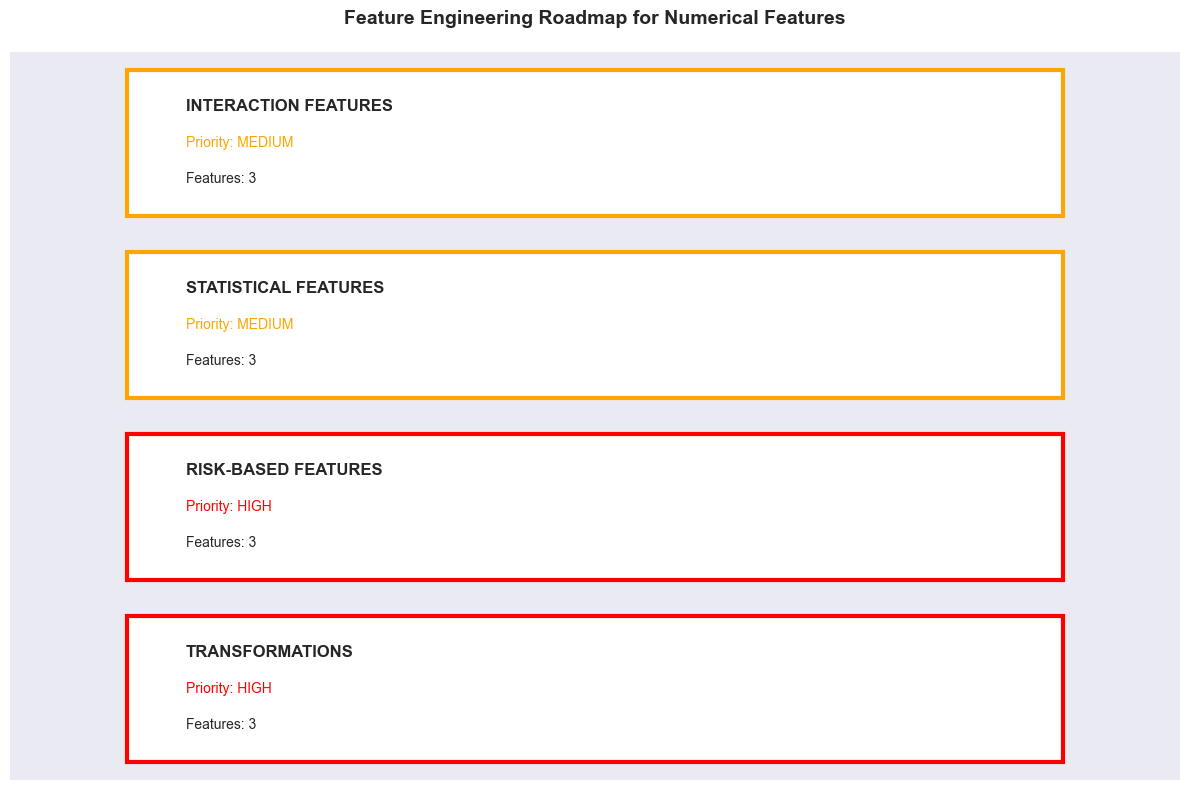

In [43]:
# %%
# Create roadmap visualization
fig, ax = plt.subplots(figsize=(12, 8))

y_pos = np.arange(len(recommendations))
priorities = [rec['priority'] for rec in recommendations]
colors = {'HIGH': 'red', 'MEDIUM': 'orange', 'LOW': 'green'}

for i, rec in enumerate(recommendations):
    # Draw feature box
    ax.add_patch(plt.Rectangle((0.1, i+0.1), 0.8, 0.8, 
                               facecolor='white', 
                               edgecolor=colors[rec['priority']], 
                               linewidth=3))
    
    # Add text
    ax.text(0.15, i+0.7, rec['feature_type'], 
            fontsize=12, fontweight='bold', va='center')
    ax.text(0.15, i+0.5, f"Priority: {rec['priority']}", 
            fontsize=10, color=colors[rec['priority']], va='center')
    ax.text(0.15, i+0.3, f"Features: {len(rec['features'])}", 
            fontsize=10, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, len(recommendations))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title('Feature Engineering Roadmap for Numerical Features', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()

# Save figure
import os
save_dir = '../../reports/task2_eda/visualizations/distributions/'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(os.path.join(save_dir, 'feature_roadmap.png'), 
            dpi=300, bbox_inches='tight')
plt.show()